In [1]:
#pip install visualkeras
#ORGINAL CODE BORROW FROM
#https://github.com/paulgavrikov/visualkeras/

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import visualkeras
from PIL import ImageFont

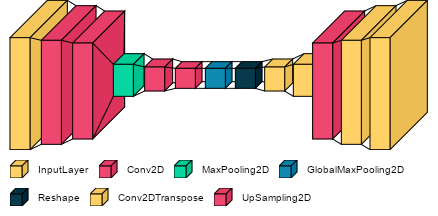

In [3]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x1 = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x2 = layers.Conv2D(32, 3, activation='relu')(x1)
x3 = layers.MaxPooling2D(3)(x2)
x4 = layers.Conv2D(32, 3, activation='relu')(x3)
x5 = layers.Conv2D(16, 3, activation='relu')(x4)
encoder_output = layers.GlobalMaxPooling2D()(x5)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

visualkeras.layered_view(encoder, to_file='encoder.png')

x6 = layers.Reshape((4, 4, 1))(encoder_output)
x7 = layers.Conv2DTranspose(16, 3, activation='relu')(x6)
x8 = layers.Conv2DTranspose(32, 3, activation='relu')(x7)
x9 = layers.UpSampling2D(3)(x8)
x10 = layers.Conv2DTranspose(16, 3, activation='relu')(x9)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x10)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

font = ImageFont.truetype("arial.ttf", 10)
visualkeras.layered_view(autoencoder, to_file='autoencoder.png')

visualkeras.layered_view(autoencoder, to_file='vgg16_legend.png', type_ignore=[visualkeras.SpacingDummyLayer],
                         legend=True, font=font)